In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb


In [30]:
Stps=pd.read_csv("50_Startups.csv")
#type of STPS
print('Stps has type',type(Stps)) 
#info of dataframe
print(Stps.info())
#description
Stps.describe()

Stps has type <class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        45 non-null     float64
 1   Administration   46 non-null     float64
 2   Marketing Spend  48 non-null     float64
 3   State            46 non-null     object 
 4   Profit           34 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB
None


,R&D Spend,Administration,Marketing Spend,Profit
count,45.000000,46.000000,48.000000,34.000000
mean,73382.444444,121952.295000,200834.512917,112148.650882
std,46351.093750,28090.528796,123457.377487,40040.847823
min,0.000000,51283.140000,0.000000,14681.400000
25%,38558.510000,106483.065000,115395.745000,90138.902500
50%,73994.560000,123467.895000,203322.230000,107978.190000
75%,100671.960000,144842.180000,298932.675000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [31]:
#Printing first 6 rows .
Stps

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,NaN,California,NaN
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,NaN
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,NaN,362861.36,NaN,156991.12
6,NaN,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,NaN
8,120542.52,148718.95,311613.29,NaN,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [32]:
#sorting values of column Profit 
Stps.sort_values('Profit',ascending=False,inplace=True) 
#I will set 'State' as index as i won't be able to use interpolate function for this column as it is string
Stps.set_index('State',inplace=True)  
Stps.head()

,R&D Spend,Administration,Marketing Spend,Profit
State,,,,
New York,165349.20,136897.80,471784.10,192261.83
Florida,153441.51,101145.55,407934.54,191050.39
Florida,142107.34,91391.77,366168.42,166187.94
NaN,131876.90,NaN,362861.36,156991.12
California,NaN,147198.87,127716.82,156122.51


### Data Cleaning

In [33]:
if Stps.isnull().any(axis = None): 
    print("\nPreview of data with null values:\n") 
    print(Stps[Stps.isnull().any(axis=1)].head()) 


Preview of data with null values:

            R&D Spend  Administration  Marketing Spend     Profit
State                                                            
NaN         131876.90             NaN        362861.36  156991.12
California        NaN       147198.87        127716.82  156122.51
New York          NaN       122616.84        261776.23  129917.04
California        NaN       139553.16        137962.62  107404.34
Florida      55493.95       103057.49              NaN   96778.92


In [34]:
#Counting MISSING Vvalues
x=Stps.isnull().sum()
#Counting total missing values in entire DataFrame
x1=Stps.isnull().sum().sum()
print("Counting the number of NaN values in columns\n",x)
print("\nTotal NaN values in Dataframe:",x1)

Counting the number of NaN values in columns
 R&D Spend           5
Administration      4
Marketing Spend     2
Profit             16
dtype: int64

Total NaN values in Dataframe: 27


In [35]:
#Filling Nan Values
Stps.interpolate(method = 'linear', axis = 0,inplace=True) #can i use interpolate used to fill NaN based on previous columns


## Adding a new Column

In [36]:
#I want to find total SG&A cost spent on Production of service
Stps['Total Spent']=Stps['R&D Spend']+Stps['Administration']+Stps['Marketing Spend']
Stps


,R&D Spend,Administration,Marketing Spend,Profit,Total Spent
State,,,,,
New York,165349.200,136897.800,471784.10,192261.83,774031.100
Florida,153441.510,101145.550,407934.54,191050.39,662521.600
Florida,142107.340,91391.770,366168.42,166187.94,599667.530
NaN,131876.900,119295.320,362861.36,156991.12,614033.580
California,126209.710,147198.870,127716.82,156122.51,401125.400
NaN,120542.520,148718.950,311613.29,152211.77,580874.760
California,123334.880,108679.170,304981.62,149759.96,536995.670
Florida,101913.080,110594.110,229160.95,146121.95,441668.140
Florida,93863.750,127320.380,249839.44,141585.52,471023.570


In [37]:
#I don't want 'State ias my index anymore so i will make it into column'
Stps.reset_index(level=0,inplace=True)
Stps.head()

,State,R&D Spend,Administration,Marketing Spend,Profit,Total Spent
0,New York,165349.20,136897.80,471784.10,192261.83,774031.10
1,Florida,153441.51,101145.55,407934.54,191050.39,662521.60
2,Florida,142107.34,91391.77,366168.42,166187.94,599667.53
3,NaN,131876.90,119295.32,362861.36,156991.12,614033.58
4,California,126209.71,147198.87,127716.82,156122.51,401125.40


## I want to calculate the percentage of profit of total amount spent  I will add one more column of it

In [38]:
Stps['Percentage_Profit']=(Stps['Profit']/Stps['Total Spent'])*100
Stps['State'].fillna(method='ffill',axis=0,inplace=True)
Stps

,State,R&D Spend,Administration,Marketing Spend,Profit,Total Spent,Percentage_Profit
0,New York,165349.200,136897.800,471784.10,192261.83,774031.100,24.839032
1,Florida,153441.510,101145.550,407934.54,191050.39,662521.600,28.836855
2,Florida,142107.340,91391.770,366168.42,166187.94,599667.530,27.713346
3,Florida,131876.900,119295.320,362861.36,156991.12,614033.580,25.567188
4,California,126209.710,147198.870,127716.82,156122.51,401125.400,38.921123
5,California,120542.520,148718.950,311613.29,152211.77,580874.760,26.203888
6,California,123334.880,108679.170,304981.62,149759.96,536995.670,27.888486
7,Florida,101913.080,110594.110,229160.95,146121.95,441668.140,33.084105
8,Florida,93863.750,127320.380,249839.44,141585.52,471023.570,30.059116
9,California,91992.390,135495.070,0.00,134307.35,227487.460,59.039452


In [39]:
#let's check if there are still any null values left
print(Stps.isnull().any())
print('\nAs we can see there is no null value left')

State                False
R&D Spend            False
Administration       False
Marketing Spend      False
Profit               False
Total Spent          False
Percentage_Profit    False
dtype: bool

As we can see there is no null value left


## Data Visualization

### Bar graph counts the number of startups in each state and shows State with maximum startups

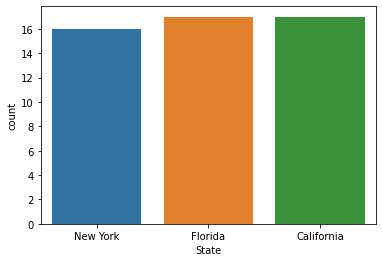

In [40]:
sb.countplot(x='State',data=Stps)

### BarPlot using groupby function
This Graph shows the state that made maximum percentage profit and shows its mean on y axis

            Sum of Percentage Profits
State                                
California                 413.609274
Florida                    397.819456
New York                   268.647311


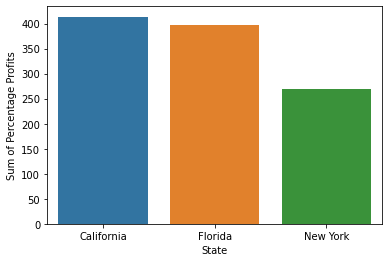

In [41]:
#Use of Groupby function
a=pd.DataFrame(Stps.groupby(['State'])['Percentage_Profit'].sum());
a=a.rename(columns={'Percentage_Profit':'Sum of Percentage Profits'});
print(a)
sb.barplot(x=a.index,y=a['Sum of Percentage Profits'],data=a);

## Heat Map
A correlation value of 1 tells us there is a high correlation and a correlation of 0 tells us that the data is not correlated at all.

In [42]:
Stps.corr()

,R&D Spend,Administration,Marketing Spend,Profit,Total Spent,Percentage_Profit
R&D Spend,1.000000,0.266947,0.645488,0.489813,0.830793,-0.001326
Administration,0.266947,1.000000,-0.058450,0.046579,0.208253,-0.120067
Marketing Spend,0.645488,-0.058450,1.000000,0.364350,0.943168,-0.240153
Profit,0.489813,0.046579,0.364350,1.000000,0.429078,0.732586
Total Spent,0.830793,0.208253,0.943168,0.429078,1.000000,-0.205760
Percentage_Profit,-0.001326,-0.120067,-0.240153,0.732586,-0.205760,1.000000


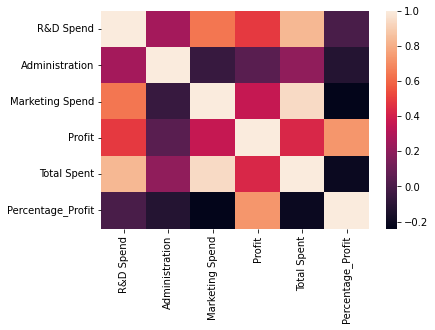

In [43]:
# Heatmap
sb.heatmap(Stps.corr())


### Histogram

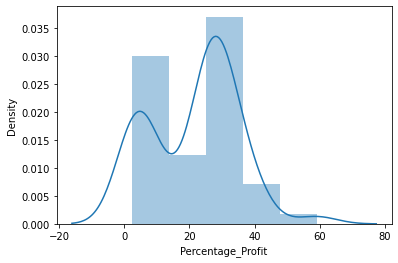

In [44]:
sb.distplot(Stps.Percentage_Profit)

### Joint Graph

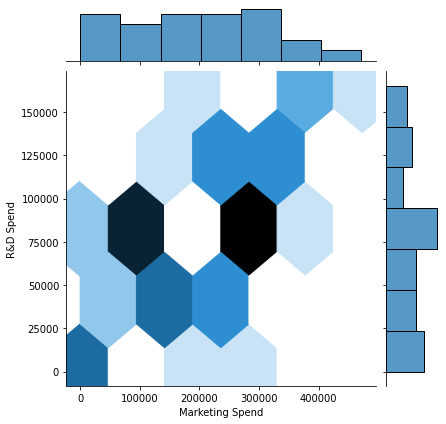

In [45]:
sb.jointplot(x='Marketing Spend', y='R&D Spend', data=Stps,kind='hex')

### Scatterplot Graph

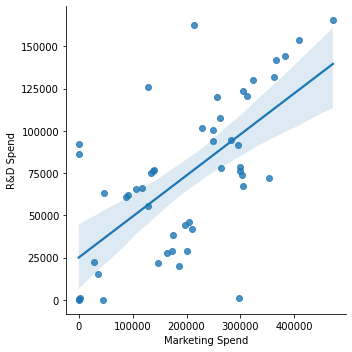

In [46]:
sb.lmplot(x='Marketing Spend', y='R&D Spend', data=Stps)

### Pie Chart
#### Below given Pie Chart shows the percentage of amount spent on Administration,R&D and on Marketing with respect to eachother

In [47]:
Stps.mean()

R&D Spend             73513.690600
Administration       121347.316700
Marketing Spend      199653.688400
Profit                80959.130600
Total Spent          394514.695700
Percentage_Profit        21.601521
dtype: float64

Below given Pie Chart shows the percentage of amount spent on Administration,
R&D and on Marketing with respect to eachother


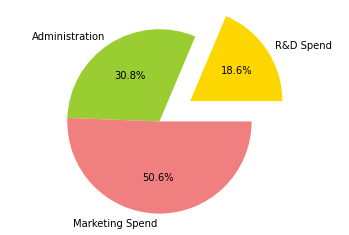

In [48]:

print("""Below given Pie Chart shows the percentage of amount spent on Administration,
R&D and on Marketing with respect to eachother""")
labels = 'R&D Spend  ', 'Administration', 'Marketing Spend'
sizes = [ 73513.690600,121347.316700, 199653.688400]
colors = ['gold', 'yellowgreen', 'lightcoral']
explode = (0.4, 0, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=False)

plt.axis('equal')
plt.show()

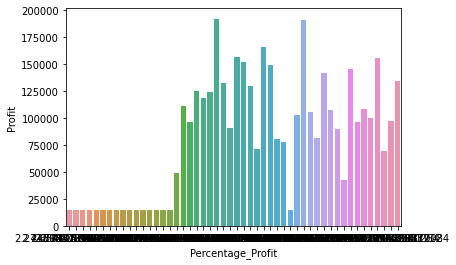

In [49]:
sb.barplot(x='Percentage_Profit',y='Profit',data=Stps)

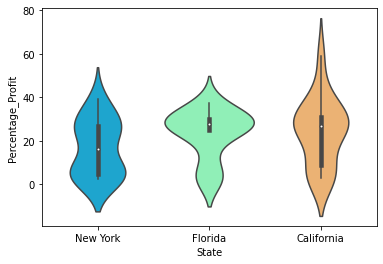

In [50]:
sb.violinplot(y="Percentage_Profit", x="State", data=Stps,palette='rainbow')

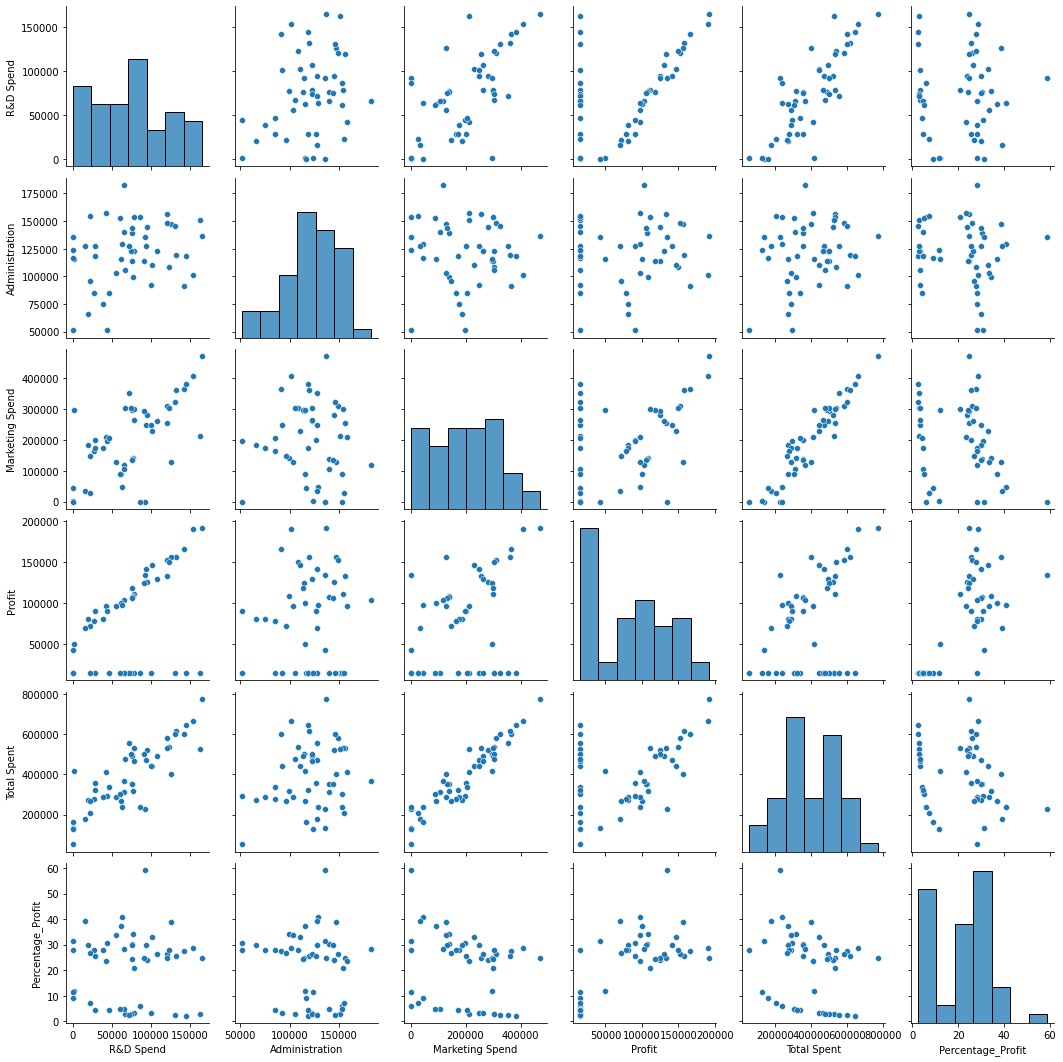

In [51]:
import warnings
warnings.filterwarnings('ignore')
sb.pairplot(Stps)

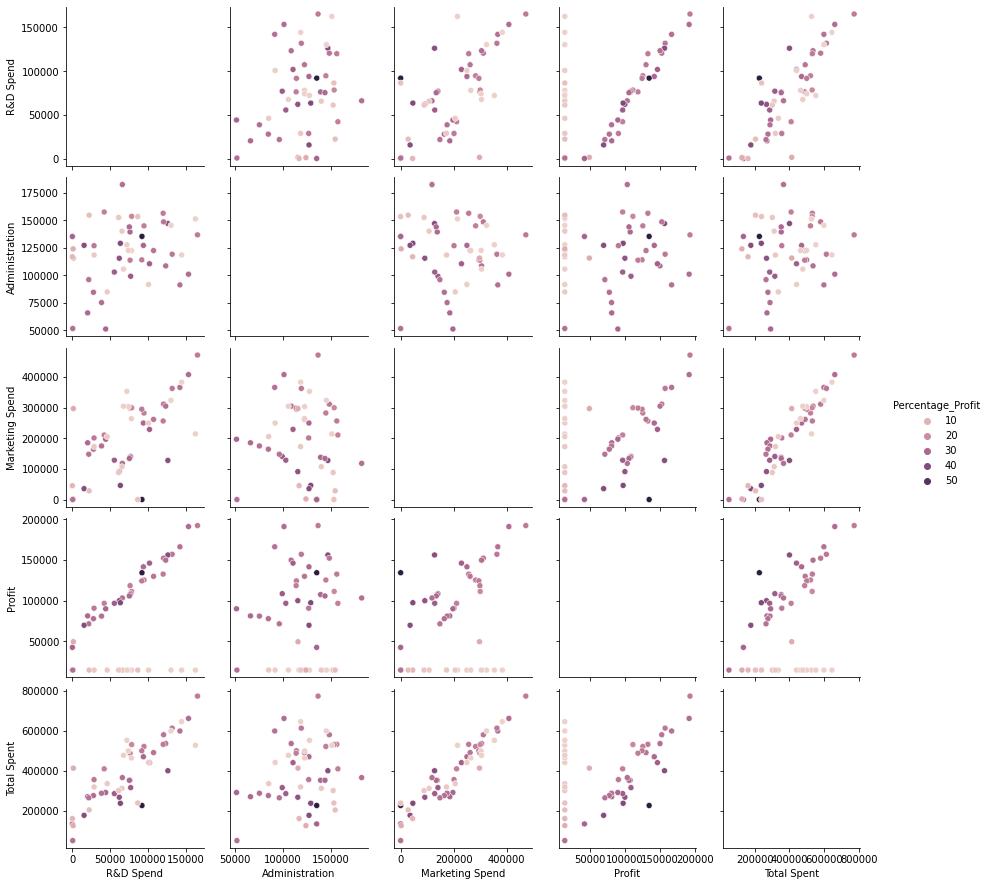

In [52]:
sb.pairplot(Stps,hue='Percentage_Profit')